# 선형회귀 모델

In [12]:
import numpy as np

#x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1) # 입력데이터 초기화
#t_data = np.array([2, 3, 4, 5, 6]).reshape(5,1) # 정답데이터 초기화
x_data = np.array([2, 3, 8, 13, 10]).reshape(5,1) # 입력데이터 초기화
t_data = np.array([8, 35, 40, 92, 83]).reshape(5,1) # 정답데이터 초기화
W = np.random.rand(1,1) # 가중치 W 초기화
b = np.random.rand(1) # 바이어스 b 초기화

In [3]:
def loss_func(x, t):# 손실함수
    y = np.dot(x,W) + b #행열 곱셈함수 dot
    return (np.sum((t - y)**2 )) / (len(x))

# numpy nditer()

In [9]:
import numpy as np

A = np.array([[1,2,3,4],[5,6,7,8]])

print(A, "\n")
print(f"A.shape =={A.shape}\n")

it = np.nditer(A, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    idx = it.multi_index
    print(idx, 'current value ->', A[idx])
    it.iternext()

[[1 2 3 4]
 [5 6 7 8]] 

A.shape ==(2, 4)

(0, 0) current value -> 1
(0, 1) current value -> 2
(0, 2) current value -> 3
(0, 3) current value -> 4
(1, 0) current value -> 5
(1, 1) current value -> 6
(1, 2) current value -> 7
(1, 3) current value -> 8


In [4]:
# 수치미분 함수
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index 
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)

        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)

        x[idx] = tmp_val
        it.iternext()
    return grad

In [14]:
learning_rate = 1e-2 # 학습율 α
f = lambda x : loss_func(x_data, t_data) 
print("Initial loss value = ", loss_func(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )
for step in range(6001):
    W -= learning_rate * numerical_derivative(f, W) 
    b -= learning_rate * numerical_derivative(f, b)
    if (step % 300 == 0): # 추가부분
        print("step = ", step, "loss value = ", loss_func(x_data, t_data), "W =", W, "b =", b)

Initial loss value =  2935.1799644586026 Initial W =  [[0.66758433]] 
 , b =  [0.92037777]
step =  0 loss value =  531.5495869946884 W = [[9.47911322]] b = [0.56897791]
step =  300 loss value =  130.15432767186957 W = [[7.02956575]] b = [0.96614916]
step =  600 loss value =  130.15262114041732 W = [[7.02267725]] b = [1.03211432]
step =  900 loss value =  130.1525387425399 W = [[7.0211636]] b = [1.04660923]
step =  1200 loss value =  130.15253476405434 W = [[7.02083099]] b = [1.04979428]
step =  1500 loss value =  130.15253457195772 W = [[7.02075791]] b = [1.05049415]
step =  1800 loss value =  130.15253456268255 W = [[7.02074185]] b = [1.05064794]
step =  2100 loss value =  130.15253456223473 W = [[7.02073832]] b = [1.05068173]
step =  2400 loss value =  130.1525345622131 W = [[7.02073755]] b = [1.05068915]
step =  2700 loss value =  130.15253456221203 W = [[7.02073738]] b = [1.05069078]
step =  3000 loss value =  130.152534562212 W = [[7.02073734]] b = [1.05069114]
step =  3300 loss v

In [11]:
def predict(x): # 예측 함수
    y = np.dot(x,W) + b
    return y

In [15]:
predict(np.array([43])) # 예축 테스트

array([302.94239632])

# 입력변수 2개 이상인 선형 회귀

In [18]:
import numpy as np

loaded_data = np.loadtxt('./data_01.csv', delimiter=',', dtype=np.float32)
x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:, [-1]] 
# 데이터 차원 및 shape 확인
print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape)

x_data.ndim =  2 , x_data.shape =  (9, 3)
t_data.ndim =  2 , t_data.shape =  (9, 1)


In [32]:
#np.random.seed(42)
W = np.random.rand(3,1) # 가중치 W 초기화
b = np.random.rand(1) # 바이어스 b 초기화
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)
# 가중치 W, 바이어스 b 업데이트 및 학습과정 결과


W =  [[0.15601864]
 [0.15599452]
 [0.05808361]] , W.shape =  (3, 1) , b =  [0.86617615] , b.shape =  (1,)


In [38]:
learning_rate = 1e-5
f = lambda x : loss_func(x_data,t_data)
print("Initial loss value = ", loss_func(x_data, t_data) )
for step in range(30001):
    W -= learning_rate * numerical_derivative(f, W) 
    b -= learning_rate * numerical_derivative(f, b)
    if (step % 3000 == 0):
        #print("step = ", step, "loss value = ", loss_func(x_data, t_data), "W = ", W, "B = ", b)
        print(f"step = {step} loss value = {loss_func(x_data, t_data)} W = {W} b = {b}")

Initial loss value =  3.6065935980508894
step = 0 loss value = 3.606593556697134 W = [[0.39972936]
 [0.51966316]
 [1.0838505 ]] b = [0.17863417]
step = 3000 loss value = 3.6064696889949723 W = [[0.39970137]
 [0.51964471]
 [1.08391871]] b = [0.17670795]
step = 6000 loss value = 3.6063462074223156 W = [[0.39967344]
 [0.51962628]
 [1.08398681]] b = [0.17478473]
step = 9000 loss value = 3.6062231107755625 W = [[0.39964554]
 [0.51960788]
 [1.0840548 ]] b = [0.17286452]
step = 12000 loss value = 3.6061003978547337 W = [[0.39961769]
 [0.51958951]
 [1.08412269]] b = [0.17094729]
step = 15000 loss value = 3.6059780674637114 W = [[0.39958988]
 [0.51957117]
 [1.08419047]] b = [0.16903306]
step = 18000 loss value = 3.605856118410011 W = [[0.39956212]
 [0.51955286]
 [1.08425814]] b = [0.16712182]
step = 21000 loss value = 3.605734549504906 W = [[0.3995344 ]
 [0.51953458]
 [1.08432571]] b = [0.16521356]
step = 24000 loss value = 3.605613359563362 W = [[0.39950672]
 [0.51951632]
 [1.08439318]] b = [0

In [39]:
test_data = np.array([100, 98, 81])
predict(test_data)

array([178.86043657])

# Liner Regression in Scikit-Learn

In [41]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [49]:
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=.25, random_state=42) # test_size=.25

c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [44]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
score = model.score(X_test, y_test)
print(f"정확도: {score}")
cofficient = model.coef_
intercept = model.intercept_
print(f"계수: {cofficient} 절편: {intercept}")

정확도: 0.6844267283527105
계수: [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01] 절편: 29.83642016383869


In [53]:
score = model.predict(X_test)
score

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

# 단순회기 분석
stats.linregress(x, y)

In [54]:
from scipy import stats

x = [32,64,96,118,126,144,152,158]
y = [18,24,61.5,49,52,105,130,125]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) # 선형 최소 제곱 회귀를 계산.
print(f"slope: {slope}\nintercept: {intercept}\nr_value: {r_value}\np_value: {p_value}\nstd_err: {std_err}")

slope: 0.8744839346616406
intercept: -26.723837731107523
r_value: 0.8880668255497455
p_value: 0.00321829451984264
std_err: 0.18480710092393707


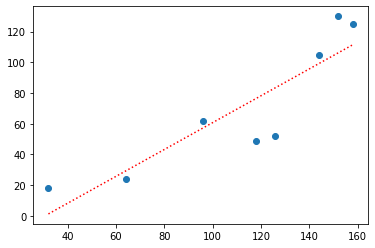

In [61]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, slope*np.array(x) + intercept, 'r:')
plt.show()

# 다중회귀 분석

In [62]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [68]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=10)

In [73]:
# StandardScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# MinMaxScaler : 최대/최소값이 각각 1, 0이 되도록 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

MinMaxScaler()

In [70]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
#
from sklearn.linear_model import LinearRegression
#
model_boston = LinearRegression().fit(X_train_scaled, y_train)
print(model_boston.coef_)
print(model_boston.intercept_)
model_boston.score(X_train_scaled, y_train)

[-13.68144003   6.5015927   -0.66180551   1.62203309  -7.43576628
  17.49391411   1.09975424 -17.01294065   6.96076337  -6.40943881
  -7.62846702   5.13590129 -19.64226007]
25.29915349564376


0.7495400632086622

In [74]:
# cross_val_score(model, X, y, scoring=None, cv=None) : 교차검증 함수
# model : 회귀 분석 모형, X : 독립 변수 데이터, y : 종속 변수 데이터, scoring : 성능 검증에 사용핛 함수b이름
# cv : 교차검증 생성기 객체 또는 숫자. None이면 KFold(3), 숫자 k이면 KFold(k) 
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(model_boston, X_train_scaled, y_train, cv=5)
r2

array([0.68677858, 0.80010349, 0.73521821, 0.76076173, 0.55966062])

In [75]:
r2.mean() # 평균 출력

0.7085045269202351

In [78]:
# mean_squared_error() ; 평균 제곱근 오차 구함(RMSE:Root Mean Square Error)
# 추정 값 또는 모델이 예측핚 값과 실제 홖경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도
# 선형회귀란 임의의 직선을 그어 이에 대핚 RMSE를 구하고, 이 값을 가장 작게 맊들어주는 w, b 값을 찾아가는 작업
import math
from sklearn.metrics import mean_squared_error # mean_squared_error: 평균 제곱 오차(mean squared error)
math.sqrt(mean_squared_error(y_train, model_boston.predict(X_train_scaled))) # 표준오차 구함

4.411312745068365

In [77]:
y_pred = model_boston.predict(X_test_scaled)
y_pred

array([31.4243217 , 31.96785487, 30.93785448, 22.34313349, 18.83846235,
       16.20617519, 35.92908162, 14.74157477, 25.07700756, 37.13230282,
       21.47652971, 30.92661826, 28.07823424, 34.02599249, 33.7778476 ,
       40.63701192, 24.25899783, 23.43019291, 25.547906  , 21.34469147,
       32.65467539, 17.80506124, 25.46149722, 25.0207691 , 32.51742137,
       20.51357936, 19.47165255, 16.87107974, 38.44316206,  0.3888111 ,
       32.39559257, 32.15518102, 26.05305015, 23.82049084, 20.56494632,
       19.66990981,  3.53212643, 35.21058387, 27.03280773, 27.67994129,
       34.36642896, 29.82003002, 18.31717228, 31.55109654, 17.93465111,
       28.4618882 , 19.39950216, 21.60782793, 38.10391926, 16.45101411,
       24.51003632, 19.57072199, 24.53359986, 34.34589029, 26.74381857,
       34.86340026, 21.02859444, 19.77400901, 18.68461884, 24.64911818,
       19.89923131, 23.52871967, 39.56690084, 42.81848202, 30.38116596,
       16.96889789, 23.83550068,  3.18952008, 31.52469303, 28.66

In [79]:
from sklearn.metrics import mean_squared_error
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred)) #RMSE : 루트 평균 제곱 오류
rmse_test

5.415403634644725

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # 결정 계수 구함. 결정계수(r2, R-squared) : 상관계수를 제곱핚 값

0.699625577298311

# 다중회귀식 추정

In [82]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [86]:
import statsmodels.formula.api as smf
formula = "medv~" + "+".join(boston_df.iloc[:,:-1].columns)
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [87]:
# OLS(Ordinary Least Squares) : 가장 기본적인 결정롞적 선형 회귀 방법.
# 잒차제곱합(RSS:Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법
# formula=formula : 원본에서 medv feature를 제외핚 상태
model_boston = smf.ols(formula=formula, data=boston_df).fit() 
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          6.72e-135
Time:                        14:30:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
import statsmodels.formula.api as smf
formula = "medv ~ rad + zn + rm + chas + age -1" # -1은 인터셉터 생성 X
model_boston2 = smf.ols(formula=formula, data=boston_df).fit() # formula : rad + zn + rm + chas + age 맊 포함
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):                   5.05e-289
Time:                        14:30:34   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
formula = "medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat-1" # -1은 인터셉터 생성 X
model_boston2 = smf.ols(formula=formula, data=boston_df).fit() # formula : rad + zn + rm + chas + age 맊 포함
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Mon, 10 Jan 2022   Prob (F-statistic):                        0.00
Time:                        14:41:35   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
zn             0.0487      0.014      3.382      0.001       0.020       0.077
indus         -0.0041      0.064     -0.063      0.950      -0.131       0.123
chas           2.8540      0.904      3.157      0.002       1.078       4.630
nox           -2.8684      3.359     -0.854      0.394      -9.468       3.731
rm             5.9281      0.309     19.178      0.000       5.321       6.535
age           -0.0073      0.014     -0.526      0.599      -0.034       0.020
dis           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
rad            0.1712      0.067      2.564      0.011       0.040       0.302
tax           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
ptratio       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
black          0.0149      0.003      5.528      0.000       0.010       0.020
lstat         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
formula = "medv~crim+zn+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat-1" # -1은 인터셉터 생성 X
model_boston2 = smf.ols(formula=formula, data=boston_df).fit() # formula : rad + zn + rm + chas + age 맊 포함
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              967.5
Date:                Mon, 10 Jan 2022   Prob (F-statistic):                        0.00
Time:                        14:41:40   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3072.
Df Residuals:                     494   BIC:                                      3122.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0928      0.034     -2.701      0.007      -0.160      -0.025
zn             0.0488      0.014      3.412      0.001       0.021       0.077
chas           2.8482      0.898      3.171      0.002       1.083       4.613
nox           -2.9275      3.222     -0.909      0.364      -9.258       3.403
rm             5.9318      0.303     19.555      0.000       5.336       6.528
age           -0.0073      0.014     -0.527      0.598      -0.034       0.020
dis           -0.9655      0.189     -5.099      0.000      -1.337      -0.593
rad            0.1723      0.064      2.687      0.007       0.046       0.298
tax           -0.0095      0.004     -2.693      0.007      -0.016      -0.003
ptratio       -0.3930      0.109     -3.607      0.000      -0.607      -0.179
black          0.0149      0.003      5.544      0.000       0.010       0.020
lstat         -0.4165      0.051     -8.225      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.123   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.966
Skew:                           1.609   Prob(JB):                    2.69e-299
Kurtosis:                      10.406   Cond. No.                     8.16e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
formula = "medv~crim+zn+chas+nox+rm+dis+rad+tax+ptratio+black+lstat-1" # -1은 인터셉터 생성 X
model_boston2 = smf.ols(formula=formula, data=boston_df).fit() # formula : rad + zn + rm + chas + age 맊 포함
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1057.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):                        0.00
Time:                        14:41:58   Log-Likelihood:                         -1523.9
No. Observations:                 506   AIC:                                      3070.
Df Residuals:                     495   BIC:                                      3116.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0928      0.034     -2.702      0.007      -0.160      -0.025
zn             0.0498      0.014      3.508      0.000       0.022       0.078
chas           2.8248      0.897      3.151      0.002       1.063       4.586
nox           -3.3945      3.096     -1.097      0.273      -9.477       2.688
rm             5.8979      0.296     19.909      0.000       5.316       6.480
dis           -0.9298      0.177     -5.262      0.000      -1.277      -0.583
rad            0.1743      0.064      2.724      0.007       0.049       0.300
tax           -0.0096      0.004     -2.710      0.007      -0.016      -0.003
ptratio       -0.3951      0.109     -3.631      0.000      -0.609      -0.181
black          0.0149      0.003      5.531      0.000       0.010       0.020
lstat         -0.4254      0.048     -8.917      0.000      -0.519      -0.332
==============================================================================
Omnibus:                      200.446   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1313.904
Skew:                           1.584   Prob(JB):                    4.89e-286
Kurtosis:                      10.230   Cond. No.                     7.79e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
formula = "medv~crim+zn+chas+rm+dis+rad+tax+ptratio+black+lstat-1" # -1은 인터셉터 생성 X
model_boston2 = smf.ols(formula=formula, data=boston_df).fit() # formula : rad + zn + rm + chas + age 맊 포함
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1162.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):                        0.00
Time:                        14:42:32   Log-Likelihood:                         -1524.5
No. Observations:                 506   AIC:                                      3069.
Df Residuals:                     496   BIC:                                      3111.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0911      0.034     -2.655      0.008      -0.158      -0.024
zn             0.0513      0.014      3.634      0.000       0.024       0.079
chas           2.7185      0.891      3.049      0.002       0.967       4.470
rm             5.7145      0.245     23.368      0.000       5.234       6.195
dis           -0.8666      0.167     -5.187      0.000      -1.195      -0.538
rad            0.1828      0.064      2.878      0.004       0.058       0.308
tax           -0.0109      0.003     -3.296      0.001      -0.017      -0.004
ptratio       -0.4002      0.109     -3.681      0.000      -0.614      -0.187
black          0.0145      0.003      5.442      0.000       0.009       0.020
lstat         -0.4492      0.042    -10.575      0.000      -0.533      -0.366
==============================================================================
Omnibus:                      198.045   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1250.213
Skew:                           1.575   Prob(JB):                    3.31e-272
Kurtosis:                      10.027   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

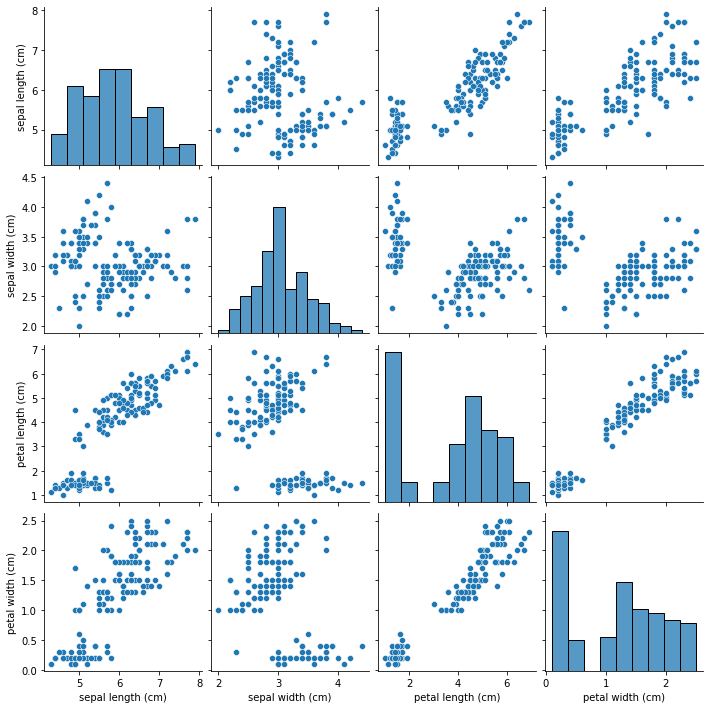

In [127]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

dataset = load_iris()
iris = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
sns.pairplot(iris)

In [107]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns)
formula
from patsy import dmatrices # 디자인 행렬 수행
# boston_df에서 formula에서 정의하지 않은 요소는 y(종속변수:medv컬럼)에
# 정의핚 요소는 X(독립변수:나머지)에 저장
# dmatrices()를 이용해서 boston_df에서 종속변수와 독립변수를 분리하는 작업 수행
y, X = dmatrices(formula, boston_df, return_type="dataframe")

In [108]:
import pandas as pd
vif = pd.DataFrame()

In [109]:
# variance_inflation_factor() : VIF 계산 함수
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns # X.columns : boston_df의 컬럼 이름 리스트
vif

,VIF Factor,features
0,585.265238,Intercept
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


In [110]:
def get_vif(formula, df): 
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type="dataframe")
    import pandas as pd
    vif = pd.DataFrame()
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

In [122]:
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns) + "-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [114]:
formula = "medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+black+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.099345,crim
1,2.451624,zn
2,14.275283,indus
3,1.142167,chas
4,73.894171,nox
5,60.598846,rm
6,21.361234,age
7,12.221605,dis
8,15.159162,rad
9,59.301541,tax


In [115]:
formula = "medv~crim+zn+indus+chas+rm+age+dis+rad+tax+black+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.097537,crim
1,2.449661,zn
2,13.150904,indus
3,1.138277,chas
4,41.406746,rm
5,19.889623,age
6,12.032952,dis
7,15.155012,rad
8,57.720347,tax
9,18.396072,black


In [118]:
formula = "medv~crim+zn+indus+chas+rm+age+dis+rad+black+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.097466,crim
1,2.375219,zn
2,9.290080,indus
3,1.118613,chas
4,39.069063,rm
5,19.780944,age
6,11.817803,dis
7,4.965633,rad
8,18.289917,black
9,9.046248,lstat


In [119]:
formula = "medv~crim+zn+indus+chas+age+dis+rad+black+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.095367,crim
1,2.334763,zn
2,9.016142,indus
3,1.116229,chas
4,14.000758,age
5,8.447694,dis
6,4.771767,rad
7,13.537020,black
8,8.358925,lstat


In [120]:
formula = "medv~crim+zn+indus+chas+dis+rad+black+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.095211,crim
1,2.313889,zn
2,8.205465,indus
3,1.106350,chas
4,8.209371,dis
5,4.689836,rad
6,10.074224,black
7,6.856889,lstat


In [121]:
formula = "medv~crim+zn+indus+chas+dis+rad+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


In [123]:
formula = "medv~crim+zn+indus+chas+dis+rad+lstat-1" # -1은 인터셉터 생성 X
model_boston2 = smf.ols(formula=formula, data=boston_df).fit() # formula : rad + zn + rm + chas + age 맊 포함
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              330.1
Date:                Mon, 10 Jan 2022   Prob (F-statistic):                   1.03e-182
Time:                        15:46:56   Log-Likelihood:                         -1895.9
No. Observations:                 506   AIC:                                      3806.
Df Residuals:                     499   BIC:                                      3835.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1840      0.071     -2.599      0.010      -0.323      -0.045
zn             0.0529      0.027      1.970      0.049       0.000       0.106
indus          0.8391      0.092      9.098      0.000       0.658       1.020
chas           9.1546      1.820      5.031      0.000       5.580      12.730
dis            3.6821      0.211     17.469      0.000       3.268       4.096
rad            0.1755      0.077      2.283      0.023       0.024       0.327
lstat         -0.3776      0.082     -4.606      0.000      -0.539      -0.217
==============================================================================
Omnibus:                       94.793   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.764
Skew:                           1.110   Prob(JB):                     2.75e-36
Kurtosis:                       4.686   Cond. No.                         107.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""